# Chapter 10: Working with Data

In [1]:
from collections import Counter
import random
import sys
import NotebookLoader
sys.meta_path.append(NotebookLoader.NotebookFinder())
import Chapter4 as CH4
import Chapter5 as CH5
import Chapter6 as CH6
import Chapter7 as CH7
import math
import matplotlib.pyplot as plt

importing Jupyter notebook from Chapter4.ipynb
importing Jupyter notebook from Chapter5.ipynb
importing Jupyter notebook from Chapter6.ipynb
importing Jupyter notebook from Chapter7.ipynb


### One Dimensional Exploratory Analysis

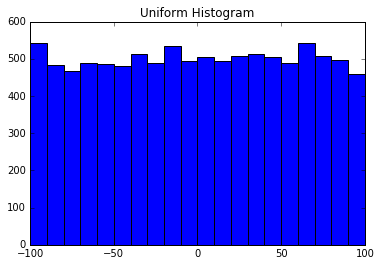

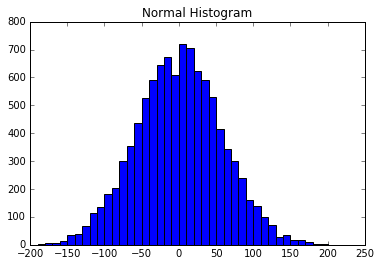

In [2]:
def toFName(title):
    return title.replace(" ", "") + ".pdf"


def bucketize(point, bucket_size):
    """floor the point to the next lower multiple of bucket_size"""
    return bucket_size * math.floor(point / bucket_size)


def make_histogram(points, bucket_size):
    """buckets the points and counts how many in each bucket"""
    return Counter(bucketize(point, bucket_size) for point in points)


def plot_histogram(points, bucket_size, title=""):
    plt.figure()
    hist = make_histogram(points, bucket_size)
    plt.bar(hist.keys(), hist.values(), width=bucket_size)
    plt.title(title)
    plt.show()


if __name__ == "__main__":
    random.seed(0)

    # Uniform between -100 and 100
    uniform = [200 * random.random() - 100 for _ in range(10000)]

    # normal distribution with mean 0, std 57
    normal = [57 * CH6.inverse_normal_cdf(random.random())
              for _ in range(10000)]

    # Plot both histograms
    plot_histogram(uniform, 10, "Uniform Histogram")
    plot_histogram(normal, 10, "Normal Histogram")



### Two Dimensions

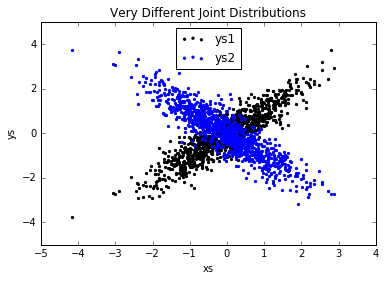

0.9010493686379609
-0.8920981526880033


In [3]:
# TWO Dimensions

# lets makes some random normal 2D data

def random_normal():
    """returns a random draw from a standard normal dist"""
    return CH6.inverse_normal_cdf(random.random())


if __name__ == "__main__":
    xs = [random_normal() for _ in range(1000)]
    ys1 = [ x + random_normal() / 2 for x in xs]
    ys2 = [-x + random_normal() / 2 for x in xs]
    
    # ys1 and ys2 would have a very similar histogram, but they have a
    # very joint distribution with xs
    plt.figure()
    plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
    plt.scatter(xs, ys2, marker='.', color='blue', label='ys2')
    plt.xlabel('xs')
    plt.ylabel('ys')
    plt.legend(loc=9)
    title = "Very Different Joint Distributions"
    plt.title(title)
    plt.show()

    print(CH5.correlation(xs, ys1))
    print(CH5.correlation(xs, ys2))


### Many Dimensions

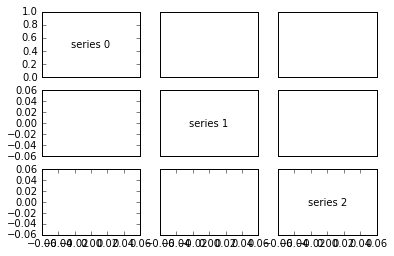

In [10]:
## Many Dimensions 

# With more than 2D, visualization is difficult
# We can switch to correlation matrices instead

def correlation_matrix(data):
    """
        returns the num_columns x num_columns matrix whose (i, j)th entry is
        is the correlation between columns i and j of the input data
    """
    _, num_columns = shape(data)

    def matrix_entry(i, j):
        return CH5.correlation(CH4.get_col(data, i), correlation(CH4.get_col(data, j)))

    return CH4.make_matrix(num_columns, num_columns, matrix_entry)


def makeScatterPlotMatrix(data):
    _, num_columns = CH4.shape(data)
    fig, ax = plt.subplots(num_columns, num_columns)

    for i in range(num_columns):
        for j in range(num_columns):
            # scatter column_j on the x axis vs column_i on the y axis
            if i != j:
                ax[i][j].scatter(CH4.get_col(data, j), CH4.get_col(data, i))
            else:
                ax[i][j].annotate("series " + str(i), (.5, .5),
                                  xycoords='axes fraction', ha="center", va="center")

            # Then hide the axis labels except left and bottom charts
            if i < num_columns -1:
                ax[i][j].xaxis.set_visible(False)
            if j > 0:
                ax[i][j].yaxis.set_visible(False)

    # Fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_xlim(ax[0][1].get_ylim())
    plt.show()


if __name__ == "__main__":

    # Make my own data
    def myMatrixEntry(i, j): random_normal()

    data = CH4.make_matrix(300, 3, myMatrixEntry)
    makeScatterPlotMatrix(data)

